### Deliverable 3: Optimizing Model

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import os
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
# Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME'], 1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Drop additional column, 'SPECIAL_CONSIDERATIONS'.
application_df = application_df.drop(['SPECIAL_CONSIDERATIONS'], 1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,142590,1


In [5]:
# Determine the number of unique values in each column.
application_col = application_df.dtypes.index.tolist()
application_df[application_col].nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
STATUS                 2
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

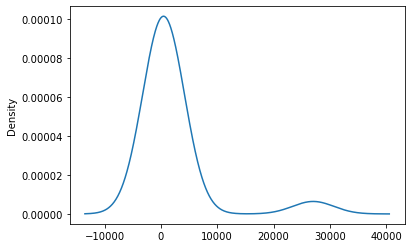

In [7]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [8]:
# Determine which values to replace if counts are less than 100
replace_application = list(application_counts[application_counts < 100].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app, "Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [9]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1820        1
C2570        1
C1283        1
C1236        1
C2500        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

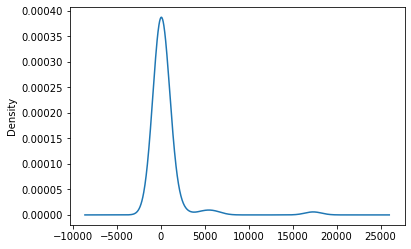

In [10]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [11]:
# Determine which values to replace if counts are less than ..?
replace_classification = list(classification_counts[classification_counts < 500].index)

# Replace in dataframe
for cls in replace_classification:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls, "Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [12]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [13]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,APPLICATION_TYPE_T9,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat, 1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"], 1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Updated Model with Changed Dataset
"SPECIAL_CONSIDERATIONS" column removed & different binning for "APPLICATION_TYPE" & "CLASSIFICATION" columns)

In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 352       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 403
Trainable params: 403
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [19]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 646us/step - loss: 0.6256 - accuracy: 0.6448
Epoch 2/100
804/804 [==============================] - 1s 667us/step - loss: 0.5792 - accuracy: 0.7095
Epoch 3/100
804/804 [==============================] - 1s 659us/step - loss: 0.5639 - accuracy: 0.7257
Epoch 4/100
804/804 [==============================] - 1s 652us/step - loss: 0.5595 - accuracy: 0.7275
Epoch 5/100
804/804 [==============================] - 1s 653us/step - loss: 0.5576 - accuracy: 0.7277
Epoch 6/100
804/804 [==============================] - 1s 655us/step - loss: 0.5562 - accuracy: 0.7280
Epoch 7/100
804/804 [==============================] - 1s 659us/step - loss: 0.5555 - accuracy: 0.7286
Epoch 8/100
804/804 [==============================] - 1s 651us/step - loss: 0.5545 - accuracy: 0.7285
Epoch 9/100
804/804 [==============================] - 1s 658us/step - loss: 0.5541 - accuracy: 0.7299
Epoch 10/100
804/804 [==============================] - 1s 654us/step - l

804/804 [==============================] - 1s 661us/step - loss: 0.5444 - accuracy: 0.7335
Epoch 80/100
804/804 [==============================] - 1s 653us/step - loss: 0.5436 - accuracy: 0.7332
Epoch 81/100
804/804 [==============================] - 1s 658us/step - loss: 0.5438 - accuracy: 0.7348
Epoch 82/100
804/804 [==============================] - 1s 654us/step - loss: 0.5441 - accuracy: 0.7327
Epoch 83/100
804/804 [==============================] - 1s 650us/step - loss: 0.5440 - accuracy: 0.7343
Epoch 84/100
804/804 [==============================] - 1s 655us/step - loss: 0.5439 - accuracy: 0.7342
Epoch 85/100
804/804 [==============================] - 1s 660us/step - loss: 0.5439 - accuracy: 0.7332
Epoch 86/100
804/804 [==============================] - 1s 644us/step - loss: 0.5436 - accuracy: 0.7347
Epoch 87/100
804/804 [==============================] - 1s 649us/step - loss: 0.5440 - accuracy: 0.7341
Epoch 88/100
804/804 [==============================] - 1s 659us/step - loss:

In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5511 - accuracy: 0.7276
Loss: 0.5510611534118652, Accuracy: 0.727580189704895


### Updated Model with Additional Neurons & Layers

In [21]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 24
hidden_nodes_layer2 = 16
hidden_nodes_layer3 = 8

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 24)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                400       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [23]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 865us/step - loss: 0.5864 - accuracy: 0.7062
Epoch 2/100
804/804 [==============================] - 1s 868us/step - loss: 0.5562 - accuracy: 0.7263
Epoch 3/100
804/804 [==============================] - 1s 866us/step - loss: 0.5515 - accuracy: 0.7299
Epoch 4/100
804/804 [==============================] - 1s 863us/step - loss: 0.5494 - accuracy: 0.7321
Epoch 5/100
804/804 [==============================] - 1s 865us/step - loss: 0.5479 - accuracy: 0.7316
Epoch 6/100
804/804 [==============================] - 1s 880us/step - loss: 0.5473 - accuracy: 0.7331
Epoch 7/100
804/804 [==============================] - 1s 870us/step - loss: 0.5458 - accuracy: 0.7324
Epoch 8/100
804/804 [==============================] - 1s 870us/step - loss: 0.5457 - accuracy: 0.7338
Epoch 9/100
804/804 [==============================] - 1s 872us/step - loss: 0.5445 - accuracy: 0.7338
Epoch 10/100
804/804 [==============================] - 1s 881us/step - l

804/804 [==============================] - 1s 823us/step - loss: 0.5370 - accuracy: 0.7374
Epoch 80/100
804/804 [==============================] - 1s 820us/step - loss: 0.5368 - accuracy: 0.7389
Epoch 81/100
804/804 [==============================] - 1s 823us/step - loss: 0.5369 - accuracy: 0.7391
Epoch 82/100
804/804 [==============================] - 1s 818us/step - loss: 0.5371 - accuracy: 0.7382
Epoch 83/100
804/804 [==============================] - 1s 824us/step - loss: 0.5370 - accuracy: 0.7386
Epoch 84/100
804/804 [==============================] - 1s 814us/step - loss: 0.5365 - accuracy: 0.7389
Epoch 85/100
804/804 [==============================] - 1s 821us/step - loss: 0.5370 - accuracy: 0.7373
Epoch 86/100
804/804 [==============================] - 1s 801us/step - loss: 0.5368 - accuracy: 0.7386
Epoch 87/100
804/804 [==============================] - 1s 826us/step - loss: 0.5366 - accuracy: 0.7390
Epoch 88/100
804/804 [==============================] - 1s 810us/step - loss:

In [25]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5544 - accuracy: 0.7285
Loss: 0.554416298866272, Accuracy: 0.7285131216049194


### Updated Model with Different Output Layer Activation Function

In [26]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  24
hidden_nodes_layer2 = 16
hidden_nodes_layer3 = 8

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="tanh"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 24)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 16)                400       
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 9         
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [28]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints_optimization/", exist_ok=True)
checkpoint_path = "checkpoints_optimization/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
BATCH_SIZE = 32
STEPS_PER_EPOCH = y_train.size / BATCH_SIZE

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=int(5*STEPS_PER_EPOCH))

In [29]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, batch_size = BATCH_SIZE, steps_per_epoch=STEPS_PER_EPOCH, callbacks=[cp_callback])

Epoch 1/100
803/803 [==============================] - 1s 866us/step - loss: 1.0213 - accuracy: 0.6338
Epoch 2/100
803/803 [==============================] - 1s 872us/step - loss: 0.5876 - accuracy: 0.7170
Epoch 3/100
803/803 [==============================] - 1s 870us/step - loss: 0.5751 - accuracy: 0.7209
Epoch 4/100
803/803 [==============================] - 1s 869us/step - loss: 0.5716 - accuracy: 0.7253
Epoch 5/100
753/803 [===========================>..] - ETA: 0s - loss: 0.5732 - accuracy: 0.7291
Epoch 00005: saving model to checkpoints_optimization/weights.05.hdf5
803/803 [==============================] - 1s 882us/step - loss: 0.5741 - accuracy: 0.7283
Epoch 6/100
803/803 [==============================] - 1s 872us/step - loss: 0.5745 - accuracy: 0.7275
Epoch 7/100
803/803 [==============================] - 1s 872us/step - loss: 0.5784 - accuracy: 0.7247
Epoch 8/100
803/803 [==============================] - 1s 874us/step - loss: 0.5736 - accuracy: 0.7294
Epoch 9/100
803/803 [

803/803 [==============================] - 1s 861us/step - loss: 0.5449 - accuracy: 0.7371
Epoch 63/100
803/803 [==============================] - 1s 874us/step - loss: 0.5463 - accuracy: 0.7360
Epoch 64/100
803/803 [==============================] - 1s 847us/step - loss: 0.5473 - accuracy: 0.7361
Epoch 65/100
766/803 [===========================>..] - ETA: 0s - loss: 0.5470 - accuracy: 0.7373
Epoch 00065: saving model to checkpoints_optimization/weights.65.hdf5
803/803 [==============================] - 1s 866us/step - loss: 0.5475 - accuracy: 0.7363
Epoch 66/100
803/803 [==============================] - 1s 830us/step - loss: 0.5464 - accuracy: 0.7363
Epoch 67/100
803/803 [==============================] - 1s 821us/step - loss: 0.5459 - accuracy: 0.7360
Epoch 68/100
803/803 [==============================] - 1s 841us/step - loss: 0.5472 - accuracy: 0.7371
Epoch 69/100
803/803 [==============================] - 1s 827us/step - loss: 0.5466 - accuracy: 0.7366
Epoch 70/100
744/803 [====

In [30]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5684 - accuracy: 0.7301
Loss: 0.5683569312095642, Accuracy: 0.7301457524299622


In [31]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")

<AxesSubplot:>

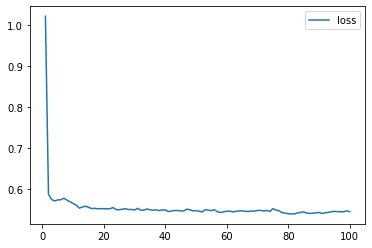

In [32]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history["loss"])+1))
# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

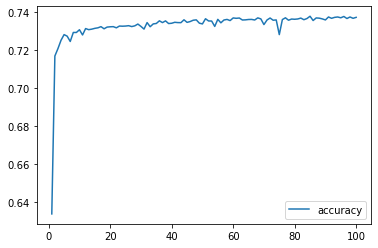

In [33]:
# Plot the accuracy
history_df.plot(y="accuracy")